# (연구&보람) AutoGluon

김보람  
2024-05-02

In [24]:
import pandas as pd
import os 

In [25]:
from autogluon.tabular import TabularDataset, TabularPredictor
import sklearn

In [40]:
df_train_fnamelst = [l for l in os.listdir("./GCNresults/") if "gamma095" in l and "train" in l]
df_train_fnamelst.sort()
df_train_fnamelst

['df_train1_2024-06-06-07-42-19_gamma095.csv',
 'df_train2_2024-06-06-07-57-18_gamma095.csv',
 'df_train3_2024-06-06-08-01-55_gamma095.csv',
 'df_train4_2024-06-06-08-05-32_gamma095.csv',
 'df_train5_2024-06-06-08-08-44_gamma095.csv',
 'df_train6_2024-06-06-08-11-47_gamma095.csv',
 'df_train7_2024-06-06-08-14-46_gamma095.csv',
 'df_train8_2024-06-06-08-17-44_gamma095.csv']

In [41]:
df_test_fnamelst = [l for l in os.listdir("./GCNresults/") if "gamma095" in l and "test" in l]
df_test_fnamelst.sort()
df_test_fnamelst

['df_test_2024-06-06-07-42-19_gamma095.csv',
 'df_test_2024-06-06-07-57-18_gamma095.csv',
 'df_test_2024-06-06-08-01-55_gamma095.csv',
 'df_test_2024-06-06-08-05-32_gamma095.csv',
 'df_test_2024-06-06-08-08-44_gamma095.csv',
 'df_test_2024-06-06-08-11-47_gamma095.csv',
 'df_test_2024-06-06-08-14-46_gamma095.csv',
 'df_test_2024-06-06-08-17-44_gamma095.csv']

In [42]:
columns = [
    'category',
    'amt',
    'gender',
    # 'street',
    # 'city',
    # 'state',
    # 'zip',
    # 'lat',
    # 'long',
    # 'city_pop',
    'job',
    'unix_time',
    'is_fraud',
#    'is_fraud_hat_prob',
    'h0','h1','h2','h3','h4','h5','h6','h7'
]

In [48]:
df_train_list = [pd.read_csv(f"GCNresults/{fname}")[Xcolumns] for fname in df_train_fnamelst]
df_test_list = [pd.read_csv(f"GCNresults/{fname}")[Xcolumns] for fname in df_test_fnamelst]

In [49]:
df_zip = zip(df_train_list,df_test_list)

In [50]:
df_train, df_test = next(df_zip)

In [51]:
predictr = TabularPredictor(
    label="is_fraud", 
    verbosity=1,
    log_to_file=False,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240608_021237"

In [52]:
predictr.fit(df_train)

AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
    If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

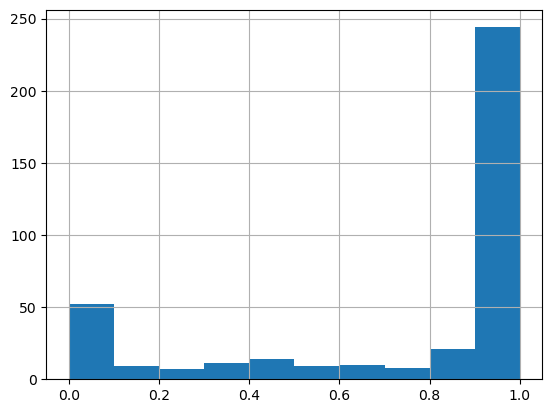

In [54]:
yyhat_prob = predictr.predict_proba(df_test).iloc[:,-1]
df_test_compact=df_test.assign(yyhat_prob = yyhat_prob).loc[:,['amt','is_fraud','yyhat_prob']]
df_test_compact[
    (df_test_compact.amt<80) & (df_test_compact.is_fraud==1)
].yyhat_prob.hist()

In [55]:
df_test_compact

314572 rows × 3 columns

In [12]:
sklearn.metrics.f1_score(
    df_test_compact[df_test_compact.amt<80].is_fraud,
    df_test_compact[df_test_compact.amt<80].yyhat_prob>0.5
)

0.631762652705061

In [13]:
sklearn.metrics.recall_score(
    df_test_compact[df_test_compact.amt<80].is_fraud,
    df_test_compact[df_test_compact.amt<80].yyhat_prob>0.5
)

0.4701298701298701

In [14]:
sklearn.metrics.precision_score(
    df_test_compact[df_test_compact.amt<80].is_fraud,
    df_test_compact[df_test_compact.amt<80].yyhat_prob>0.5
)

0.9627659574468085